<a href="https://colab.research.google.com/github/MICHAELFOLA/Machine-Learning-Works/blob/master/DigitClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

#Importingb built in digits data from Sklearn
from sklearn.datasets import load_digits 

In [11]:
digits = load_digits()

In [12]:
print(digits.data.shape)

(1797, 64)


<Figure size 432x288 with 0 Axes>

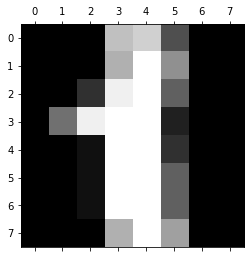

In [14]:
plt.gray()
plt.matshow(digits.images[1])
plt.show()

In [16]:
#to split data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size = 0.25, 
                                                    random_state = 0)

In [17]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [18]:
model.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [21]:
predictions = model.predict(x_test)
score = model.score(x_test, y_test)

In [22]:
print(score)

0.9511111111111111


In [23]:
import seaborn as sns
from sklearn import metrics

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [24]:
cm = metrics.confusion_matrix(y_test, predictions)

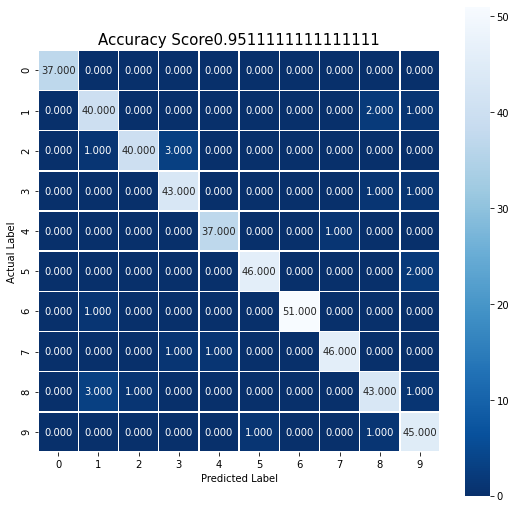

In [28]:
plt.figure(figsize=(9,9))
sns.heatmap(cm,annot=True, fmt = ".3f",linewidths=.5,square=True,cmap="Blues_r")
plt.ylabel("Actual Label")
plt.xlabel("Predicted Label")
all_sample_title = "Accuracy Score{0}".format(score)
plt.title(all_sample_title, size = 15)
plt.show()

In [30]:
index = 0
misclassifiedIndexes = []
for label, predict in zip(y_test, predictions):
  if label != predict:
    misclassifiedIndexes.append(index)
  index += 1

In [31]:
len(misclassifiedIndexes)

22

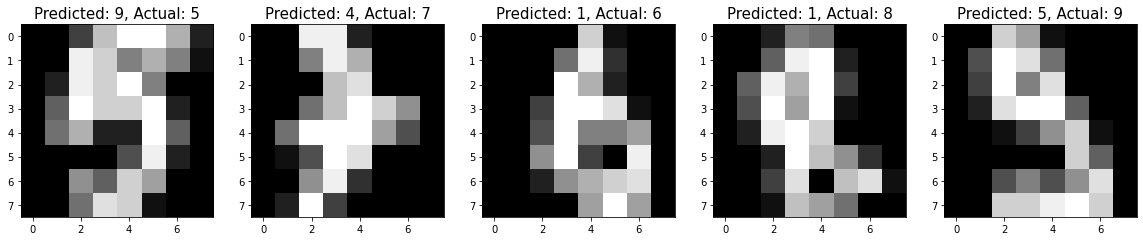

In [38]:
plt.figure(figsize = (20,4))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[0:5]):
  plt.subplot(1,5, plotIndex+1)
  plt.imshow(np.reshape(x_test[badIndex], (8,8)), cmap = plt.cm.gray)
  plt.title('Predicted: {}, Actual: {}'.format(predictions[badIndex], y_test[badIndex]), fontsize = 15)
